<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/CNN_CIFAR_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, MaxPooling2D, BatchNormalization

In [2]:
# Fetching Dataset

data = tf.keras.datasets.cifar10

(J_train,k_train), (J_test,k_test) = data.load_data()
J_train, J_test = J_train/255, J_test/255
k_train, k_test = k_train.flatten(), k_test.flatten()

In [3]:
# Finding number of classes

print(f'Number of classes: {len(set(k_train))}')

Number of classes: 10


In [4]:
# Constructing Model

i = Input(shape=J_train[0].shape)

# First level of Convolution
o = Conv2D(32, (3,3), activation='relu', padding='same')(i)
o = Conv2D(32, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

# Second Level of Convolution
o = Conv2D(64, (3,3), activation='relu', padding='same')(o)
o = Conv2D(64, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

# Second Level of Convolution
o = Conv2D(128, (3,3), activation='relu', padding='same')(o)
o = Conv2D(128, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

o = Flatten()(o)
o = Dropout(0.2)(o)
o = Dense(512, activation='relu')(o)
o = Dropout(0.2)(o)
o = Dense(1024, activation='relu')(o)
o = Dense(10, activation='softmax')(o)

clf = Model(i,o)

In [5]:
# Compiling and Fitting Model

clf.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
# Fitting modle with augmentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(J_train, k_train, batch_size)
steps_per_epoch = J_train.shape[0] // batch_size
r = clf.fit(train_generator, validation_data=(J_test, k_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 32s 18ms/step - loss: 1.7989 - accuracy: 0.3688 - val_loss: 1.3816 - val_accuracy: 0.5161
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1535 - accuracy: 0.5908 - val_loss: 1.0915 - val_accuracy: 0.6163
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9592 - accuracy: 0.6651 - val_loss: 0.9454 - val_accuracy: 0.6758
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8532 - accuracy: 0.7065 - val_loss: 0.8808 - val_accuracy: 0.7017
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7744 - accuracy: 0.7309 - val_loss: 0.7292 - val_accuracy: 0.7488
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7205 - accuracy: 0.7521 - val_loss: 0.6564 - val_accuracy: 0.7753
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6759 - accuracy: 0.7697 - val_loss: 0.7005 -

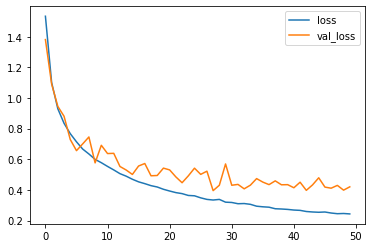

In [9]:
# Checking Loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

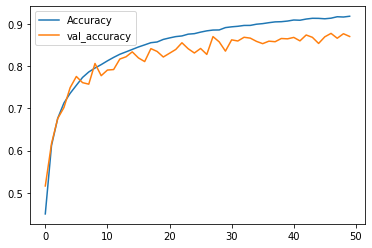

In [10]:
# Checking Accuracy

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[858  11  16  11   6   3  12   4  60  19]
 [  4 953   0   4   0   0   2   0   6  31]
 [ 27   1 753  57  40  35  53  11   9  14]
 [  7   2  15 792  26  78  44  13   9  14]
 [  7   1   9  38 861  13  41  23   4   3]
 [  4   2   6 164  22 759  23  16   0   4]
 [  2   2   6  36   3   3 941   2   4   1]
 [  4   1   5  24  23  29   4 897   3  10]
 [ 19   4   1   5   1   1   4   1 942  22]
 [  6  33   2   2   0   0   4   1   8 944]]


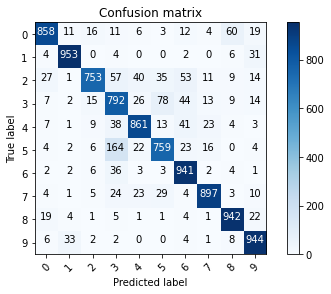

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = clf.predict(J_test).argmax(axis=1)
cm = confusion_matrix(k_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

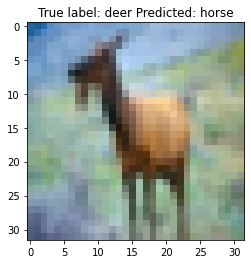

In [34]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != k_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(J_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[k_test[i]], labels[p_test[i]]));